# Анализ данных по датасету

In [22]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Здесь реализация функций поиска адреса и id самеры по пути изображения 

In [23]:
def get_address(path):
    return None

def get_cam_id(path):
    return None

#### Создаем колонки как в колаб ноутбуке для проверки

In [24]:
result = pd.DataFrame(columns=['directory', 'filename', 'is_animal_there', 'is_it_a_dog',
                           'is_the_owner_there', 'color', 'tail', 'address', 'cam_id'])

#### Перечень всех директорий

In [25]:
rootdir = '/Users/mariadonskova/Downloads/07. Сервис для поиска пропавших животных/Датасет/'
rootdir = '/Users/mariadonskova/Desktop/Тестовые снимки/'

list_ = []
for dirs in os.listdir(rootdir):
    d = os.path.join(rootdir, dirs)
    if os.path.isdir(d):
        for dirss in os.listdir(d):
            dr = os.path.join(d, dirss)
            if os.path.isdir(dr):
                list_.append(dirss)

In [26]:
d_tail = {'длинный': 1, 'короткий': 0}
d_color = {'разноцветный': 0, 'светлый': 1, 'темный': 2}

In [27]:
import re

def get_columns(subdirs):
    tail, color = None, None
    regex = re.compile('[,\.!?-]')
    after_regex = regex.sub('', subdirs)
    reg = after_regex.lower().split(' ')
    for item in reg:
        if item in d_tail.keys():
            tail = d_tail[item]
        if item in d_color.keys():
            color = d_color[item]
    return tail, color

In [28]:
def create_df(subdirs, dr, result):
    tail, color = get_columns(subdirs)
    files = os.listdir(dr)
    df3 = pd.DataFrame(np.zeros((len(files), len(columns))), columns=columns)
    df3['directory'] = os.path.join(dirs, subdirs)
    df3['filename'] = files
    df3['is_animal_there'] = np.ones(len(files))
    df3['is_it_a_dog'] = np.ones(len(files))
    df3['color'] = color * np.ones(len(files))
    df3['tail'] = tail * np.ones(len(files))
    result = result.append(df3, ignore_index=True)
    return result

In [29]:
cd /Users/mariadonskova/Desktop/Тестовые снимки

/Users/mariadonskova/Desktop/Тестовые снимки


(314, 9)

In [30]:
!find . -name '.DS_Store' -delete

In [31]:
!find . -name '._*' -delete

### Создаем датафрейм и заполняем колонки в соответсвии с названиями папок

In [32]:
columns=['directory', 'filename', 'is_animal_there', 'is_it_a_dog',
                           'is_the_owner_there', 'color', 'tail', 'address', 'cam_id']

result = pd.DataFrame(columns=columns)

for dirs in os.listdir(rootdir):
    d = os.path.join(rootdir, dirs)
    if os.path.isdir(d):
        if dirs == 'Пустые':
            files = os.listdir(d)
            df1 = pd.DataFrame(np.zeros((len(files), len(columns))), columns=columns)
            df1['directory'] = dirs
            df1['filename'] = files
            result = result.append(df1, ignore_index=True)
        elif (dirs == 'Другие животные') or (dirs == 'не собаки'):
            files = os.listdir(d)
            df4 = pd.DataFrame(np.zeros((len(files), len(columns))), columns=columns)
            df4['directory'] = dirs
            df4['filename'] = files
            df4['is_animal_there'] = np.ones(len(files))
            df4['is_it_a_dog'] = np.zeros(len(files))
            result = result.append(df4, ignore_index=True)
        elif (dirs == 'Хозяин и собака') or (dirs =='Хоязин и собака'):
            files = os.listdir(d)
            df2 = pd.DataFrame(np.zeros((len(files), len(columns))), columns=columns)
            df2['directory'] = dirs
            df2['filename'] = files
            df2['is_animal_there'] = np.ones(len(files))
            df2['is_it_a_dog'] = np.ones(len(files))
            df2['is_the_owner_there'] = np.ones(len(files))
            result = result.append(df2, ignore_index=True)
        elif (dirs == 'Только собака') or (dirs == 'Только собаки'):
            for subdirs in os.listdir(d):
                dr = os.path.join(d, subdirs)
                if os.path.isdir(dr):
                    result = create_df(subdirs, dr, result)


result['address'] = result['filename'].apply(lambda x: get_address(x))
result['cam_id'] = result['cam_id'].apply(lambda x: get_address(x))

all_files = 0
for _, _, files in os.walk(rootdir):
    all_files += len(files)
assert result.shape[0] == all_files, f'NOT ALL IMAGES ARE PROCESSED {result.shape[0]}, {all_files}'

In [33]:
np.unique(result.directory)

array(['Пустые', 'Только собаки/РАЗНОЦВЕТНЫЙ КОРОТКИЙ',
       'Только собаки/СОБАКА РАЗНОЦВЕТНЫЙ ДЛИННЫЙ',
       'Только собаки/СОБАКА СВЕТЛЫЙ ДЛИННЫЙ',
       'Только собаки/СОБАКА СВЕТЛЫЙ КОРОТКИЙ',
       'Только собаки/ТЕМНЫЙ ДЛИННЫЙ',
       'Только собаки/ТЕМНЫЙ КОРОТКИЙ', 'Хоязин и собака', 'не собаки'],
      dtype=object)

In [34]:
result.head()

,directory,filename,is_animal_there,is_it_a_dog,is_the_owner_there,color,tail,address,cam_id
309,Хоязин и собака,А47.jpg,1.0,1.0,1.0,0.0,0.0,None,None
310,Хоязин и собака,А84.jpg,1.0,1.0,1.0,0.0,0.0,None,None
311,Хоязин и собака,С76.jpg,1.0,1.0,1.0,0.0,0.0,None,None
312,Хоязин и собака,С63.jpg,1.0,1.0,1.0,0.0,0.0,None,None
313,Хоязин и собака,С88.jpg,1.0,1.0,1.0,0.0,0.0,None,None


In [35]:
pwd

'/Users/mariadonskova/Desktop/Тестовые снимки'

In [36]:
result.to_csv('etalons', index=False)

## EDA of Train Data

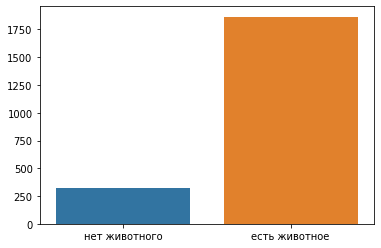

In [245]:
x=['нет животного', 'есть животное']
summary_color = result.groupby('is_animal_there').size()
y = [summary_color.iloc[i] for i in range(len(x))]
sns.barplot(x, y)

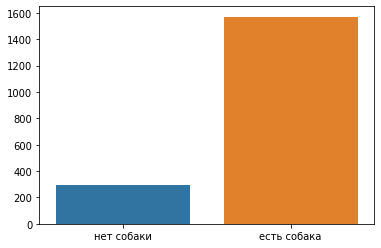

In [246]:
x=['нет собаки', 'есть собака']
summary_color = result[result['is_animal_there'] == 1].groupby('is_it_a_dog').size()
y = [summary_color.iloc[i] for i in range(len(x))]
sns.barplot(x, y)

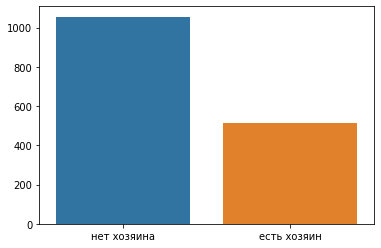

In [247]:
x=['нет хозяина', 'есть хозяин']
summary_color = result[result['is_it_a_dog'] == 1].groupby('is_the_owner_there').size()
y = [summary_color.iloc[i] for i in range(len(x))]
sns.barplot(x, y)

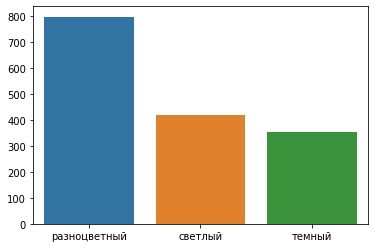

In [248]:
x=['разноцветный', 'светлый', 'темный']
summary_color = result[result['is_it_a_dog'] == 1].groupby('color').size()
y = [summary_color.iloc[i] for i in range(len(x))]
sns.barplot(x, y)

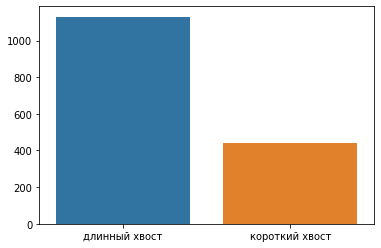

In [249]:
x=['длинный хвост', 'короткий хвост']
summary_color = result[result['is_it_a_dog'] == 1].groupby('tail').size()
y = [summary_color.iloc[i] for i in range(len(x))]
sns.barplot(x, y)

## EDA of Test Data

### change root 

/Users/aleksandr/miniconda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


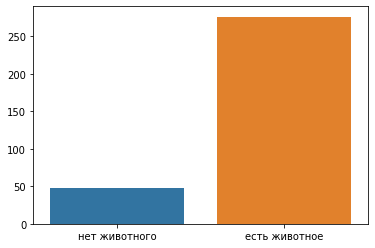

In [203]:
x=['нет животного', 'есть животное']
summary_color = result.groupby('is_animal_there').size()
y = [summary_color.iloc[i] for i in range(len(x))]
sns.barplot(x, y)

/Users/aleksandr/miniconda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


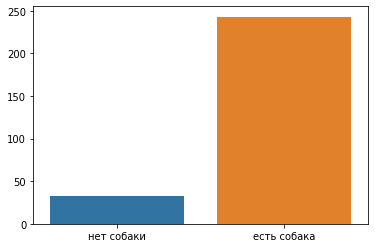

In [199]:
x=['нет собаки', 'есть собака']
summary_color = result[result['is_animal_there'] == 1].groupby('is_it_a_dog').size()
y = [summary_color.iloc[i] for i in range(len(x))]
sns.barplot(x, y)

/Users/aleksandr/miniconda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


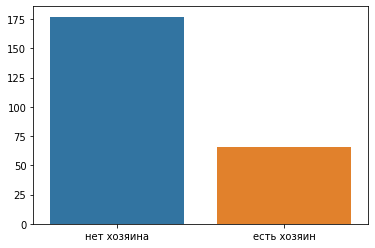

In [200]:
x=['нет хозяина', 'есть хозяин']
summary_color = result[result['is_it_a_dog'] == 1].groupby('is_the_owner_there').size()
y = [summary_color.iloc[i] for i in range(len(x))]
sns.barplot(x, y)

/Users/aleksandr/miniconda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


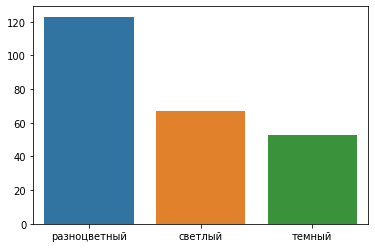

In [201]:
x=['разноцветный', 'светлый', 'темный']
summary_color = result[result['is_it_a_dog'] == 1].groupby('color').size()
y = [summary_color.iloc[i] for i in range(len(x))]
sns.barplot(x, y)

/Users/aleksandr/miniconda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


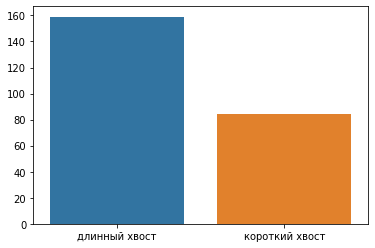

In [202]:
x=['длинный хвост', 'короткий хвост']
summary_color = result[result['is_it_a_dog'] == 1].groupby('tail').size()
y = [summary_color.iloc[i] for i in range(len(x))]
sns.barplot(x, y)